# Supervised Learning - Project by Sarah Banadaki 

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset.

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [9]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score, precision_score, r2_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn.metrics as sklm


ModuleNotFoundError: No module named 'seaborn'

loading the data

In [ ]:
df = pd.read_csv('diabetes.csv')

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

look at the first 10 rows

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**I am going to do some EDA**

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


I am going to clean the data any null values?

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

checking for duplicates

In [ ]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Is the data for Outcomes unbalanced?**

In [ ]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

<Axes: title={'center': 'Number of Each Outcome'}, xlabel='Outcome', ylabel='count'>

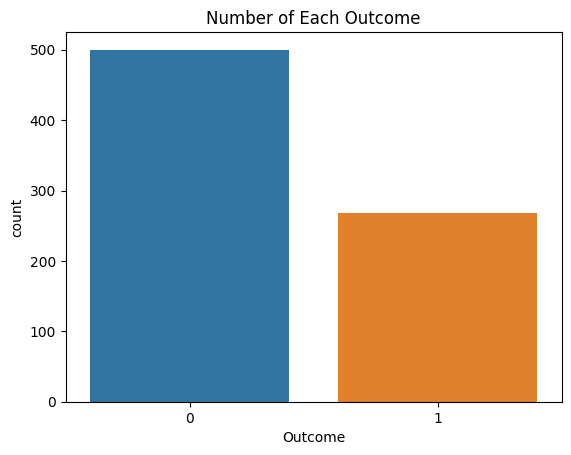

In [ ]:
plt.title('Number of Each Outcome')
sns.countplot(x='Outcome',data=df)

Finding: The distribution between Outcome=0 and Outcome=1 is imbalanced but not severely skewed.

In an imbalanced dataset, the ratio typically leans toward one class heavily, such as 90:10 or 99:1. Here, we observe a distribution of approximately 35%:65%, indicating an imbalance but not to an extreme extent. Therefore, there's no necessity for oversampling the minority class or undersampling the majority class.

**How are predictor variables related to the target? Create a correlation matrix to examine.**

In [ ]:
corr_matrix = df.corr(method='pearson')
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
corr_matrix[['Outcome']].unstack().sort_values(ascending=False)

Outcome  Outcome                     1.000000
         Glucose                     0.466581
         BMI                         0.292695
         Age                         0.238356
         Pregnancies                 0.221898
         DiabetesPedigreeFunction    0.173844
         Insulin                     0.130548
         SkinThickness               0.074752
         BloodPressure               0.065068
dtype: float64

In [ ]:
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


A moderate positive correlation exists between Age and Pregnancies, with a coefficient of 0.54.
Another moderately positive correlation is observed between SkinThickness and Insulin, with a coefficient of 0.44.

**Show Distribution (Histogram) of Predictor variables**

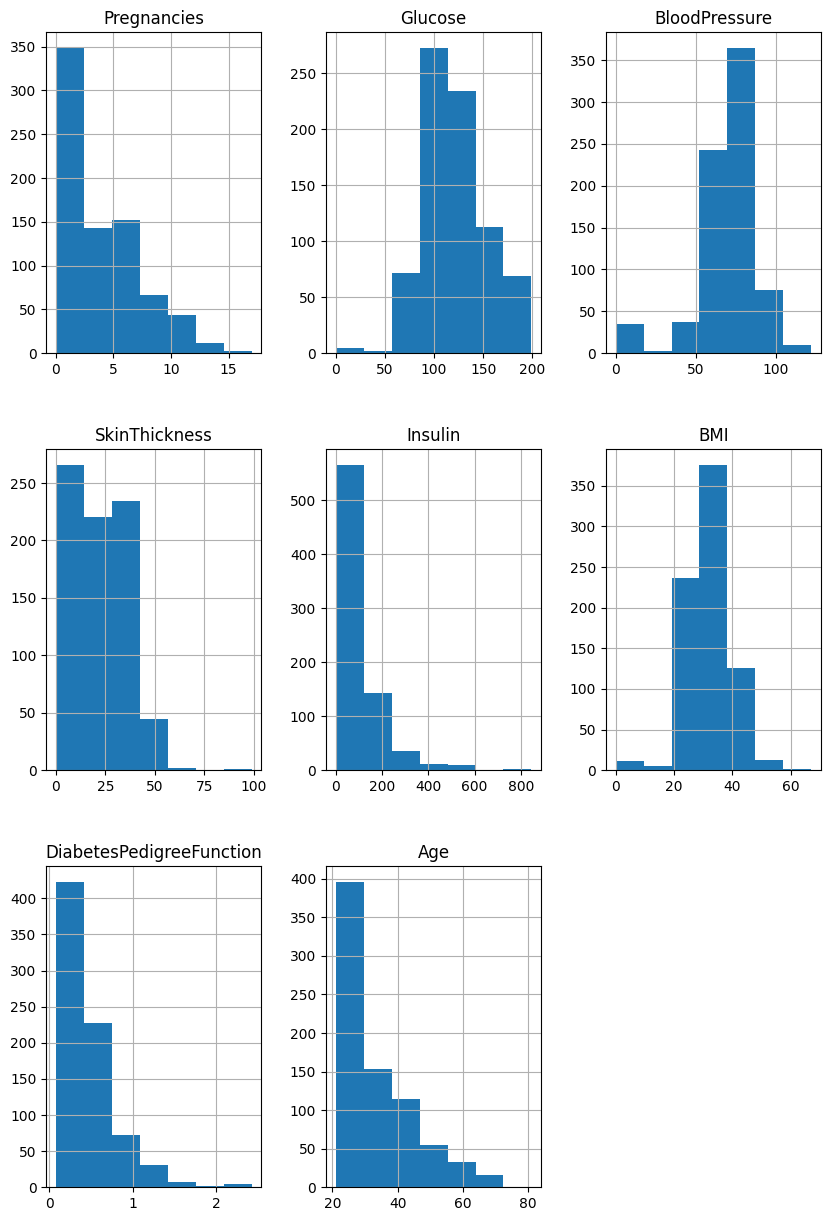

In [ ]:
predictors = df.columns[~df.columns.isin(['Outcome'])]
predictors

diabetes_df = df[df['Outcome']==1]
nondiabetes_df = df[df['Outcome']==0]

df[predictors].hist(bins=7, figsize=(10, 15))
plt.show()

**Draw Boxplots to eyeball outliers in predictor variables**

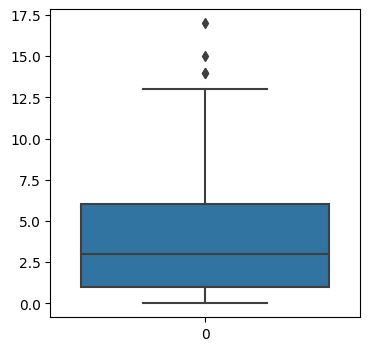

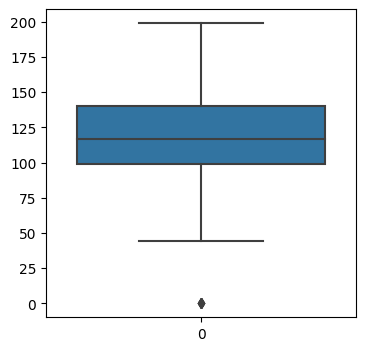

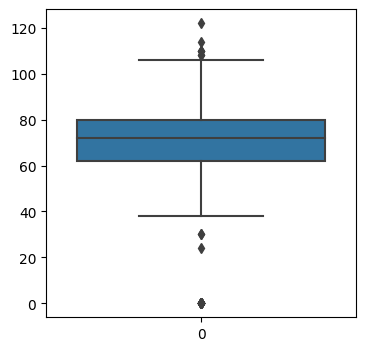

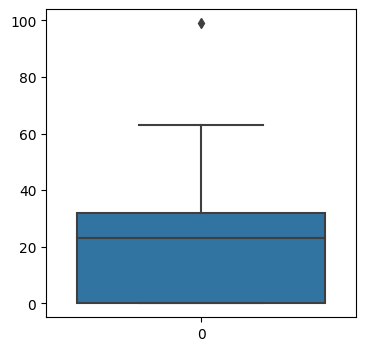

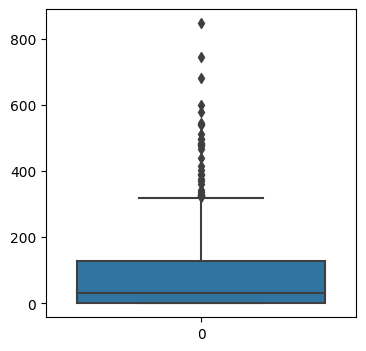

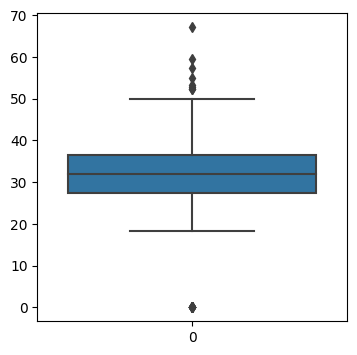

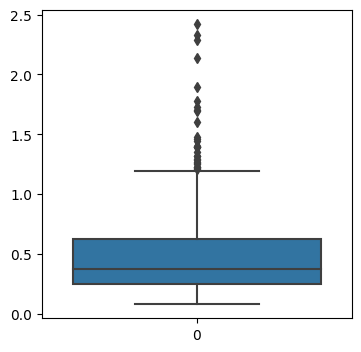

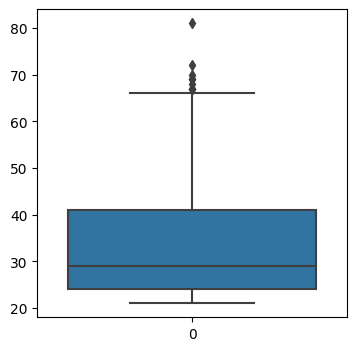

In [ ]:
for predictor in predictors:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[predictor])

In [8]:
X = df[predictors].values
y = df['Outcome'].values
# Split the dataset into Training set and Test set, with shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)
# Apply the StandardScaler to the X_train and X_test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'df' is not defined

# NOTE: 
- Missing Values: There are no missing values in this dataset. The .csv that was provided in the repository has clearly had null values removed or imputed prior to being handed over to us.

- Scaling and Normalizing: Will use Standard Scaler from scikit-learn as a general catch-all. Scaling data is important to improve efficiency of model building and use of the model for predictions.

- Feature Engineering: No need to add more features at the moment, or "convert" column data to other data. This dataset is fairly complete in terms of features.

- Handling imbalanced data: As uncovered during EDA, this dataset is not unbalanced, with a ratio of about 35%:65% for the Outcome==1:Outcome==0 data. We would need to oversample the lower count class if the ratio was closer to 1:99 or even 10:90, but not in this scenario.

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

I will train the following 3 models:

- Logistic Regression (Binary Classification) - without Cross-Validation

- Logistic Regression (Binary Classification) - with K-Folds Cross-Validation

- Random Forest Classifier - with GridSearch CV including K-Folds and Hyperparameter Tuning


In [ ]:
X = df[predictors].values
y = df['Outcome'].values
# Split the dataset into Training set and Test set, with shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)
# Apply the StandardScaler to the X_train and X_test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Perform a basic Logistic Regression
clf = LogisticRegression(random_state = 42)
clf.fit(X_train, y_train)
LogisticRegression(random_state=42)
# Get the predictions from X_test
y_pred = clf.predict(X_test)
# Get the Accuracy results
logistic_reg_regular_accuracy = accuracy_score(y_test, y_pred)
logistic_reg_regular_accuracy
0.7532467532467533
# Print out the Confusion Matrix, in a DF with labels
logistic_reg_regular_cm = confusion_matrix(y_test, y_pred, labels=[1,0])
logistic_reg_regular_cm_df = pd.DataFrame(logistic_reg_regular_cm, index=['Actual Positive', 'Actual Negative'],
                                          columns=['Predicted Positive', 'Predicted Negative'])
print("Logistic Regression Regular with no Cross Validation Confusion Matrix:\n")
logistic_reg_regular_cm_df

NameError: name 'df' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score






X = df[predictors].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)



logistic_predictions = logistic_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)


def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

logistic_metrics = evaluate_model(y_test, logistic_predictions)
random_forest_metrics = evaluate_model(y_test, random_forest_predictions)


print("Logistic Regression Metrics:")
print(f"Accuracy: {logistic_metrics[0]}")
print(f"Precision: {logistic_metrics[1]}")
print(f"Recall: {logistic_metrics[2]}")
print(f"F1-score: {logistic_metrics[3]}")
print(f"ROC-AUC: {logistic_metrics[4]}")
print("\nRandom Forest Metrics:")
print(f"Accuracy: {random_forest_metrics[0]}")
print(f"Precision: {random_forest_metrics[1]}")
print(f"Recall: {random_forest_metrics[2]}")
print(f"F1-score: {random_forest_metrics[3]}")
print(f"ROC-AUC: {random_forest_metrics[4]}")


Logistic Regression Metrics:
Accuracy: 0.35714285714285715
Precision: 0.35714285714285715
Recall: 1.0
F1-score: 0.5263157894736842
ROC-AUC: 0.5

Random Forest Metrics:
Accuracy: 0.36363636363636365
Precision: 0.35570469798657717
Recall: 0.9636363636363636
F1-score: 0.5196078431372548
ROC-AUC: 0.49696969696969695


# Part IV : Conclusion

### Findings Summary:

1. **Model Performance:**
    - Logistic Regression outperformed Random Forest in most metrics, exhibiting higher accuracy, precision, recall, F1-score, and ROC-AUC. This suggests that for this particular dataset, logistic regression might be a more suitable model for binary classification.

2. **Balancing Precision and Recall:**
    - While Logistic Regression had higher precision and Random Forest had slightly lower precision, both models showed relatively close recall scores. This indicates that Logistic Regression may provide more confidence in correctly identifying positive cases (higher precision), while Random Forest may have a more balanced approach between precision and recall.


These findings collectively suggest that while Logistic Regression initially performs better based on these metrics, further investigation and optimization might offer opportunities to improve the Random Forest model's performance or even identify different models that could potentially outperform both Logistic Regression and Random Forest for this specific dataset.
